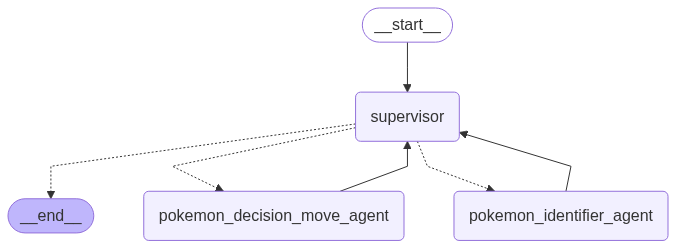

In [1]:
from IPython.display import display, Image
from supervisor_agent import supervisor

display(Image(supervisor.get_graph().draw_mermaid_png()))

In [2]:
from IPython.display import display
import ipywidgets as widgets

uploader = widgets.FileUpload()

# Create a text input widget
text_input = widgets.Text(
    value='',
    placeholder='Type your query here',
    description='Query:',
    disabled=False,
    layout=widgets.Layout(width='500px')
)

# Function to handle input
def on_submit(change):
    print("You entered:", change.new)

# Link the function to input change 
text_input.observe(on_submit, names='value')

display(text_input, uploader)

# Example Queries
# Should I use Moon blast or Water Gun against Salamence?
# Should I use Moon blast or Water Gun against Pikachu?

# Example Queries (With Uploaded Image)
# Should I use Earthquake or Water Gun?
# Should I use Fire Kick or Water Gun?

Text(value='', description='Query:', layout=Layout(width='500px'), placeholder='Type your query here')

FileUpload(value=(), description='Upload')

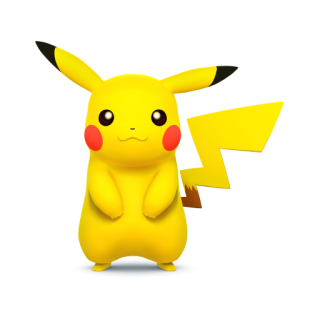

Query sent to llm is: I have uploaded an image of the pokemon to 'uploaded_pokemon.png', Should I use Earthquake or Water Gun?


In [3]:
# Display uploaded image 
from PIL import Image

# assigning query the string typed in
query = text_input.value 

# checking if an image has been uploaded
if not uploader.value:
    upload_text = ""
    print("image not uploaded")

else:
    # Saving the file
    filename = uploader.value[0]['name']  

    with open("uploaded_pokemon.png", 'wb') as f:
        f.write(uploader.value[0]['content'])
        
    image = Image.open("uploaded_pokemon.png")
    display(image)

    # formatted text
    upload_text = f"I have uploaded an image of the pokemon to 'uploaded_pokemon.png'"
    query = upload_text + ", " + query


print(f"Query sent to llm is: {query}")

In [4]:
from supervisor_agent import supervisor
from system_prompt import sys_prompt

for chunk in supervisor.stream(
    {
        "messages": [
            {
            "role": "system",
            "content": sys_prompt,
            },
            {
            "role": "user",
            "content": f"{query}",
            }
        ]
    },
):
    print(chunk)
    
final_message_history = chunk["supervisor"]["messages"]

{'supervisor': None}
{'pokemon_identifier_agent': {'messages': [HumanMessage(content="Identify the Pokémon in the image 'uploaded_pokemon.png' and determine its type.", additional_kwargs={}, response_metadata={}, id='5928d47e-c286-4dbd-ae48-5d4569ebf0f4'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wkfRzX6JIbsDwiVn5gT2iBf9', 'function': {'arguments': '{"image_path": "uploaded_pokemon.png"}', 'name': 'pokemon_identifier'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 220, 'total_tokens': 256, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BrhOFMPZYUh1tgSlhrkLBQP18zCfA', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_

In [5]:
for message in final_message_history:
    message.pretty_print()

================================ System Message ================================

You are a Supervisor Agent that delegates tasks to two specialized agents:
- The **Pokemon Identifier Agent** identifies the Pokémon (by name or image) and determines its type.
- The **Pokemon Decision Move Agent** selects the most effective move against that Pokémon based on its type.

You do NOT do any reasoning or answering yourself. Instead, you must:
- Rephrase or extract the user’s question into a clear task.
- Assign the task to the appropriate agent (only ONE at a time).
- After one agent responds, decide whether to delegate to the other agent or finish.

Always wait for the result before assigning the next agent.
================================ Human Message =================================

I have uploaded an image of the pokemon to 'uploaded_pokemon.png', Should I use Earthquake or Water Gun?
================================ Human Message =================================

Identify the Pokémo